In [105]:
#load the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# after plotting graph, many times depending on version of working library like matplotlib graph will not be displayed in output screen below
# For that we have to write everytime plt.show(). So if you write '%matplotlib inline' we don't need to write show() method.
import warnings # any library will give you future warnings regarding updates in functions. To ignore it write this line
warnings.filterwarnings('ignore')


#Descriptive Analytics for Numerical Columns




In [106]:
#loading data to dataframe
data =pd.read_csv("sales_data_with_discounts.csv")

In [107]:
data.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [108]:
# Identify numerical and categorical columns
data.dtypes
#Volume, Avg Price, Total Sales Value, Discount Rate (%), Discount Amount, and Net Sales Value are numerical values
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = data.select_dtypes(include=['object']).columns
print("Numerical Columns:", numerical_columns.tolist())
print("\nCategorical Columns:",categorical_columns.tolist())

Numerical Columns: ['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']

Categorical Columns: ['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model']


In [109]:
data.describe()
# describe method returns a statistical summary of the numerical data by skipping NaN values.

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


 **Interpretation:**
All the numerical columns have outliers and a right skwiness as Mean greater than Median, where Avg Price and Total Sales Value has high variance compare to other numerical columns.

#Data Visualization

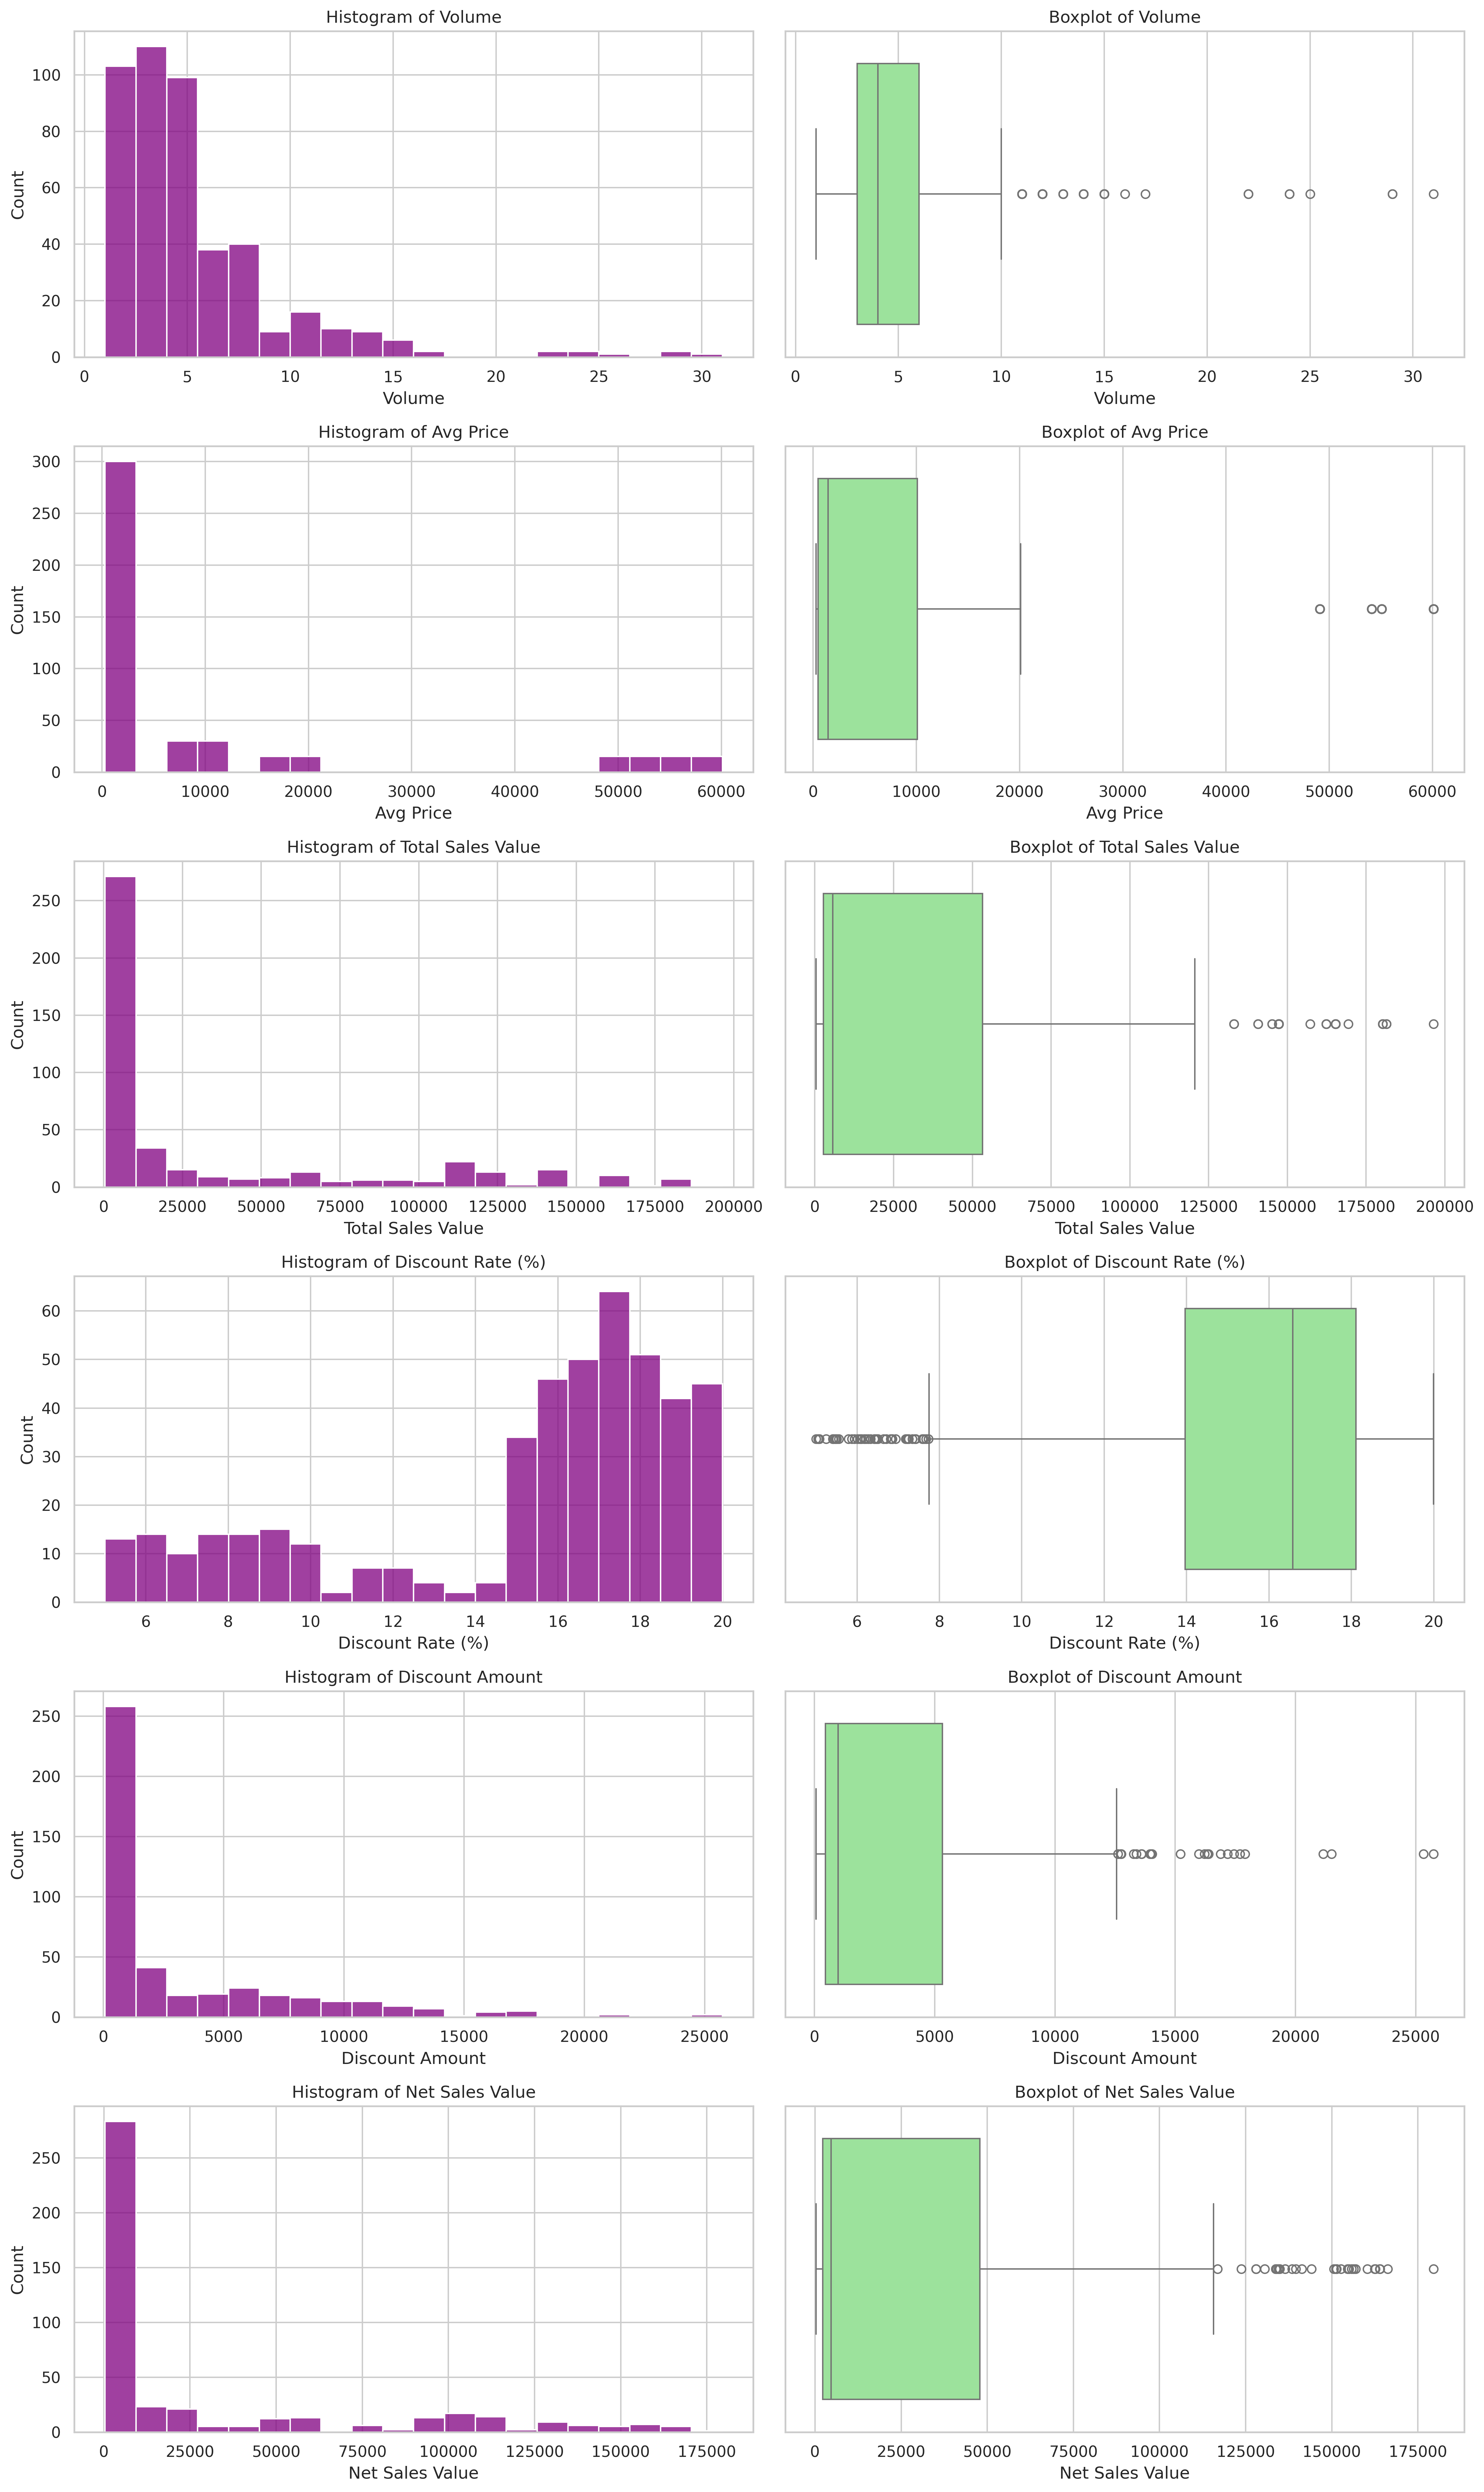

In [110]:
# Histograms and Boxplots
fig, axes = plt.subplots(len(numerical_columns), 2, figsize=(15, 25))
for i, col in enumerate(numerical_columns):
    sns.histplot(data[col], bins=20, ax=axes[i, 0], color='purple')
    axes[i, 0].set_title(f'Histogram of {col}')
    sns.boxplot(x=data[col], ax=axes[i, 1], color='lightgreen')
    axes[i, 1].set_title(f'Boxplot of {col}')
plt.tight_layout()



**Analysis and Findings from histogram and boxplot:**

*Volume:* There are outliers and a slight positive skew with a small number of high-volume values extending the range.

*Avg Price:* there are outliers and high positive skew where a few high prices significantly influence the dataset.

*Total Sales Value:* There are outliers due to high value transcations and high positive skew

*Discount Rate (%):* There are outliers visible at higher rates with minimal skew

*Discount Amount:*There are outliers and positive skew with a small number of high-volume values.

*Net Sales Value:*There are outliers and positive skew due to high sales values.


**Inferences:**



Outliers in Avg Price, Total Sales Value, and Net Sales Value could mislead summary statistics. Hence they should be treated carefully

Strong positive skew occurss in columns Avg Price, Total Sales Value. the data can be normalize for analysis.

Discount Rate (%) has minimal skewness and fewer outliers.

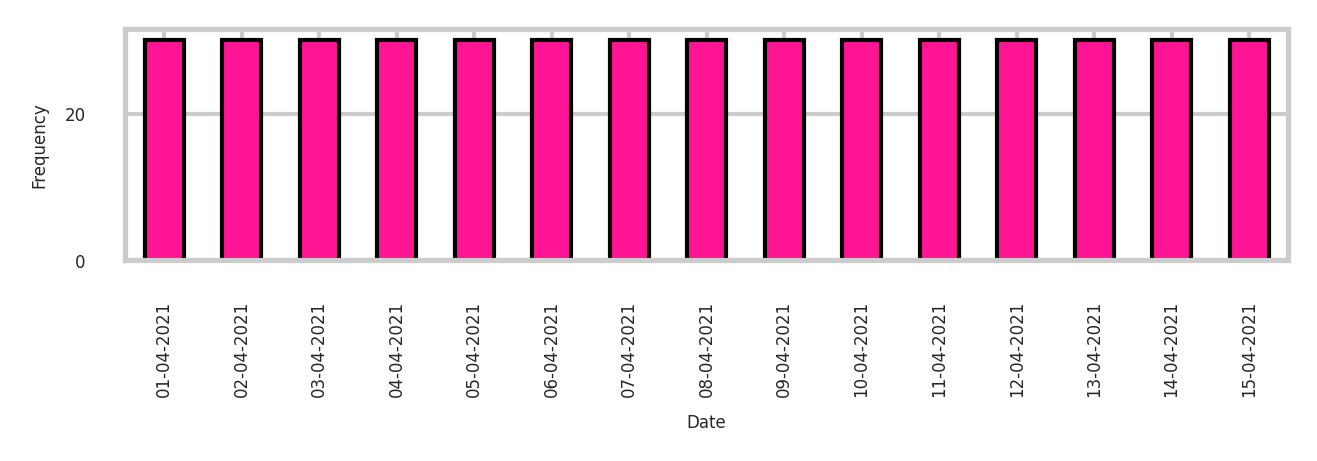

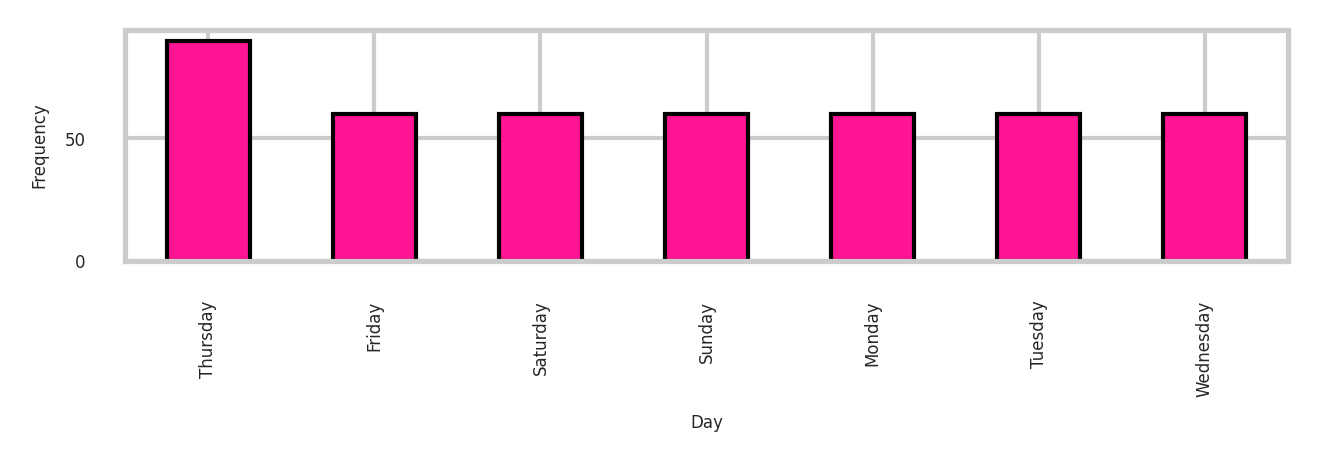

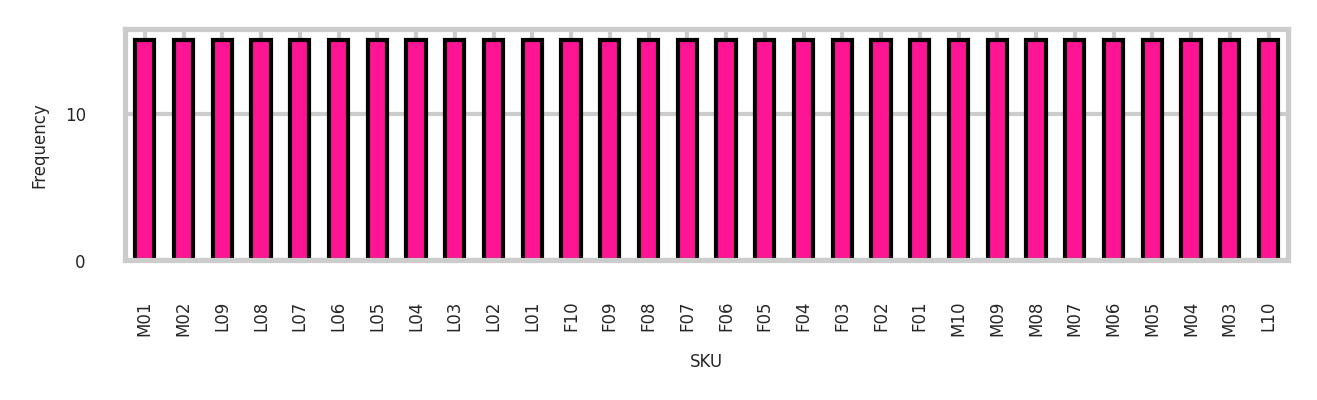

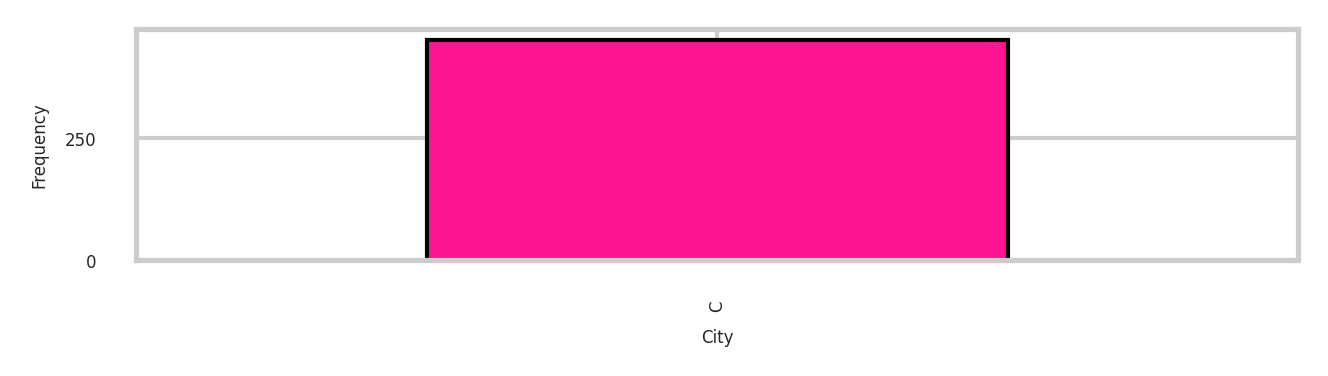

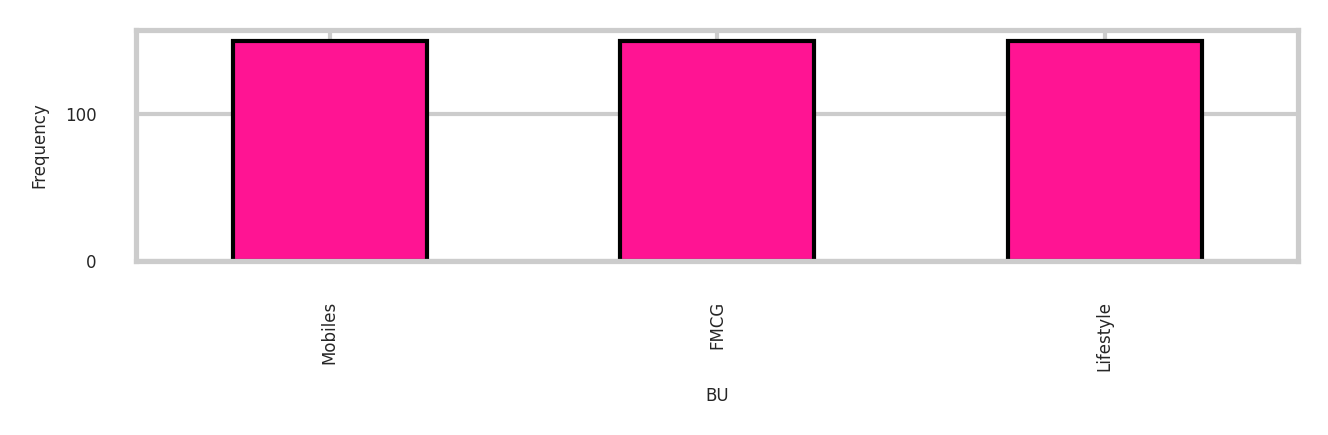

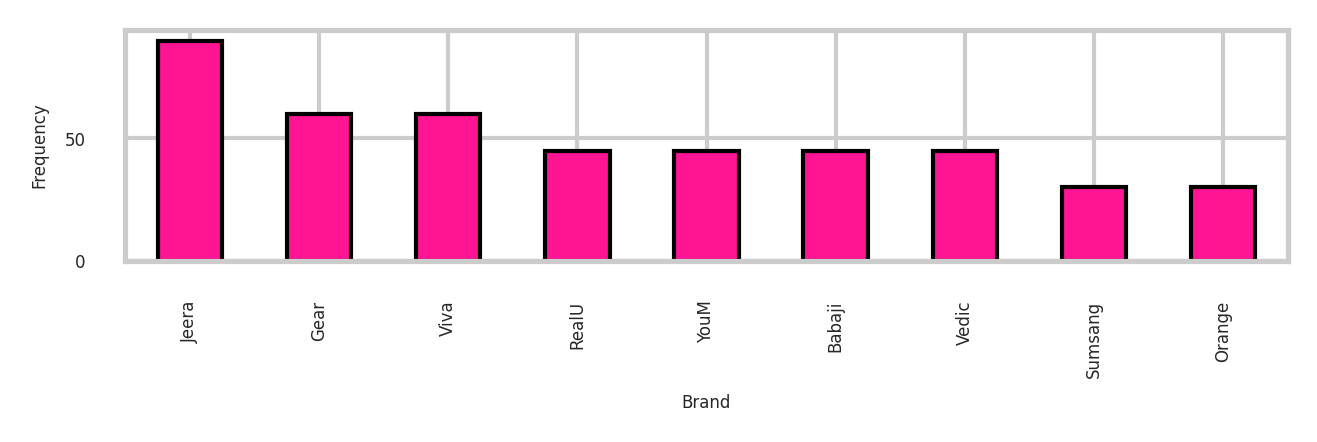

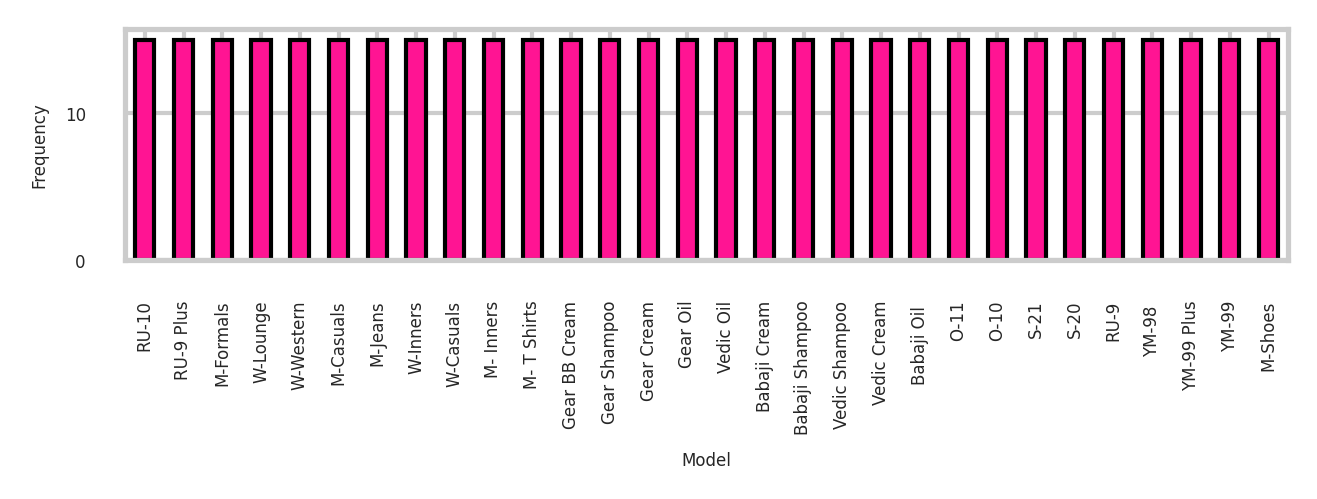

In [111]:
# Bar charts for categorical columns
for col in categorical_columns:
    plt.figure(figsize=(5, 1))
    data[col].value_counts().plot(kind='bar',edgecolor ='black',color ='deeppink')
    plt.xlabel(col,fontsize=4)
    plt.xticks(fontsize=4)
    plt.ylabel('Frequency',fontsize=4)
    plt.yticks(fontsize=4)



**Analysis from Bar chart:**


Date:The count for each unique values is 30 and they are equally distributed.

Day:The count for each unique values is  7 and they are equally distributed, except for Thursday. And sales are high on Thursday.

SKU:The count for each unique values is 15 and they are equally distributed.

City: This column has only one unique value i.e 'c' and the count for each unique values is  450.

BU:This column has 3 categories. The count for each unique values is 150 and they are equally distributed.

Brand:The categories in this column are unequally distributed where the brand Jeera has the highest number of sales.

Model:The count for each unique values is 15 and they are equally distributed.

#Standardization of Numerical Variables

Standardization involves transforming raw data values to a standard scale with a mean of 0 and a standard deviation of 1.

Standardization or Z-Score is the transformation of features by subtracting from mean and dividing by standard deviation. This is often called as Z-score.
Formula: z=x-mu/sigma.

It helps in reduciong the impact of extreme values, improves model performance, and makes data more comparable across different datasets.

In [112]:
# Numerical columns before Standardization
data.describe().T


,count,mean,std,min,25%,50%,75%,max
Volume,450.0,5.066667,4.231602,1.000000,3.000000,4.000000,6.000000,31.000000
Avg Price,450.0,10453.433333,18079.904840,290.000000,465.000000,1450.000000,10100.000000,60100.000000
Total Sales Value,450.0,33812.835556,50535.074173,400.000000,2700.000000,5700.000000,53200.000000,196400.000000
Discount Rate (%),450.0,15.155242,4.220602,5.007822,13.965063,16.577766,18.114718,19.992407
Discount Amount,450.0,3346.499424,4509.902963,69.177942,460.459304,988.933733,5316.495427,25738.022194
Net Sales Value,450.0,30466.336131,46358.656624,326.974801,2202.208645,4677.788059,47847.912852,179507.479049


In [113]:
# Standardization of Numerical Variables
scaled_data=data.copy()
for col in numerical_columns:
  scaled_data[col]=(scaled_data[col]-scaled_data[col].mean())/scaled_data[col].std()
scaled_data.describe().T #after Standardization

,count,mean,std,min,25%,50%,75%,max
Volume,450.0,4.934325e-17,1.0,-0.961023,-0.488389,-0.252072,0.220563,6.128490
Avg Price,450.0,3.947460e-17,1.0,-0.562140,-0.552461,-0.497980,-0.019548,2.745953
Total Sales Value,450.0,1.184238e-17,1.0,-0.661181,-0.615668,-0.556303,0.383638,3.217313
Discount Rate (%),450.0,-3.552714e-17,1.0,-2.404259,-0.281993,0.337043,0.701198,1.146084
Discount Amount,450.0,-5.921189e-17,1.0,-0.726694,-0.639934,-0.522753,0.436816,4.964968
Net Sales Value,450.0,3.947460e-18,1.0,-0.650134,-0.609684,-0.556283,0.374937,3.214958


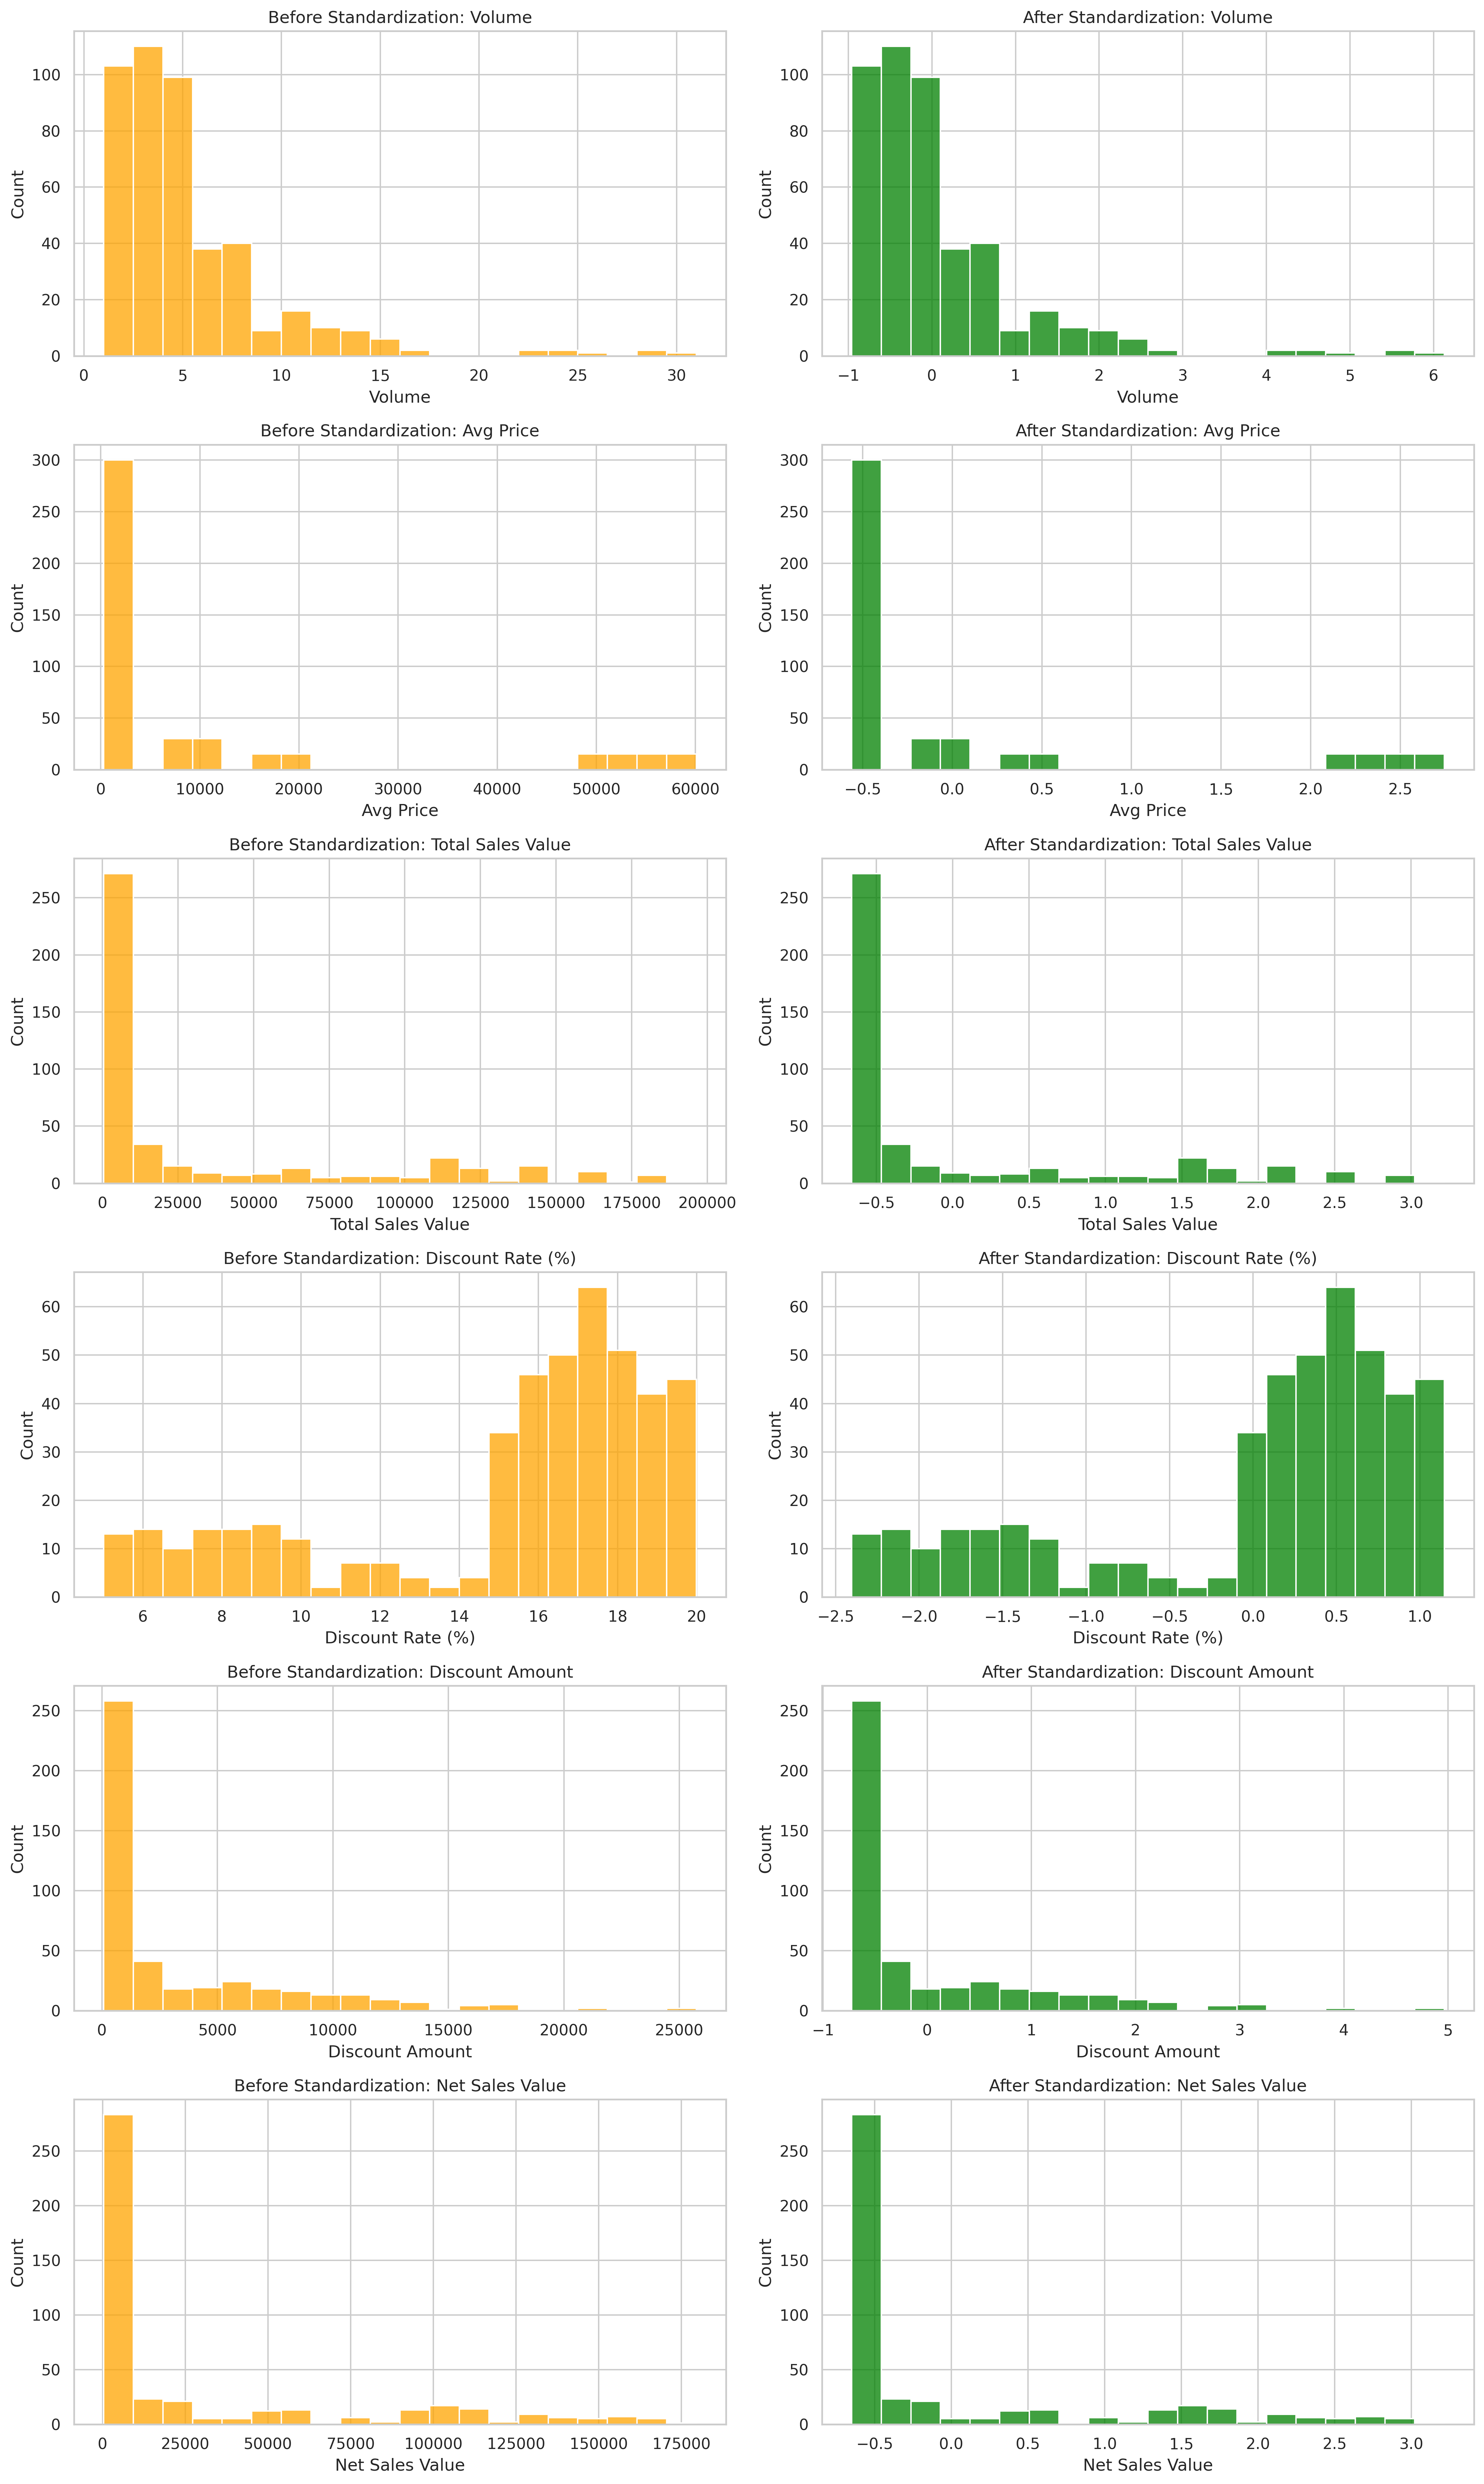

In [114]:
# before and after Standardization comparisons of the data distributions using histogram
fig, axes = plt.subplots(len(numerical_columns), 2, figsize=(15, 25))
for i, col in enumerate(numerical_columns):
    sns.histplot(data[col], bins=20, ax=axes[i, 0], color='orange')
    axes[i, 0].set_title(f'Before Standardization: {col}')
    sns.histplot(x=scaled_data[col],bins=20, ax=axes[i, 1], color='green')
    axes[i, 1].set_title(f'After Standardization: {col}')
plt.tight_layout()
plt.show()

#Conversion of Categorical Data into Dummy Variables

One Hot Encoding is a method for converting categorical variables into a binary format.

statistical models require numeric inputs to function correctly. Hence, by transforming categorical data into numeric data using dummy variables, we can include these variables in our models. Also it improves the overall performance of machine learning models

In [115]:
data_encoded=pd.get_dummies(data,dtype=int) # Using pandas get_dummies function to convert categorical data into dummy variables
data_encoded.head()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Date_01-04-2021,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,15,12100,181500,11.654820,21153.498820,160346.501180,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10,10100,101000,11.560498,11676.102961,89323.897039,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,16100,112700,9.456886,10657.910157,102042.089843,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,6,20100,120600,6.935385,8364.074702,112235.925298,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,3,8100,24300,17.995663,4372.946230,19927.053770,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


#CONCLUSION


**Descriptive Analytics:** It Computes mean, median, mode, and standard deviation .

**Histograms and Boxplots:** these Visualizes the distributions, skewness and outliers for numerical data.

**Bar Charts:** It Shows the frequency of categorical data.

Data preprocessing techniques:

**Standardization:**This technique scales data to a common range to prevent features with large ranges from dominating others. It transforms data to have a mean of 0 and a standard deviation of 1.

**One-Hot Encoding:**  This technique converts categorical variables into binary vectors, allowing them to be processed by models.
